# Assignment - Linear Regression

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

## Contents
***
<a href='#I'>**I. Data Understanding**</a>

<a href='#II'>**II. Data Preparation and EDA**</a>

<a href='#III'>**III. Spliting dataset and Scaling**</a>

<a href='#IV'>**IV. Model Building**</a>

<a href='#V'>**V. Residual Analysis**</a>

<a href='#VI'>**VI. Making Predictions and Model Evaluation**</a>

<a href='#VII'>**VII. Interpretation**</a>
*****

### I. Data Understanding<a id='I'></a>

In [2]:
# imoport data into a dataframe
data = pd.read_csv('CarPrice_Assignment.csv')

# lets have a priliminary look at the dataset
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

There are 16 numerical and 10 non-numerical variables in the raw form of this dataset. Also, as we can notice, each variable consists of 205 entries which is the total number of entries. This suggests that there are no null values in the dataset.

In [4]:
#lets confirm the number of null values in the dataset
print('Number of null values in the dataset = ' + str(data.isnull().sum().sum()))

Number of null values in the dataset = 0


In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Values of variables have high variance accross the dataset, hence, it will require Scaling.

Lets have a look at the number of unique values that each column has.

In [6]:
data.nunique().sort_values(ascending=False)

car_ID              205
price               189
curbweight          171
CarName             147
carlength            75
horsepower           59
wheelbase            53
carheight            49
enginesize           44
carwidth             44
boreratio            38
stroke               37
compressionratio     32
highwaympg           30
citympg              29
peakrpm              23
fuelsystem            8
cylindernumber        7
enginetype            7
symboling             6
carbody               5
drivewheel            3
enginelocation        2
doornumber            2
aspiration            2
fueltype              2
dtype: int64

1. There are 205 unique car_IDs. This suggests that there are no duplicate entries in our dataset.
2. Some of the car names are repetative. This suggests that same cars with multiple generation may exists in the dataset.

### II. Data Preparation and EDA<a id='II'></a>

Lets understand each variable individually and prepare the dataset. First we'll take care of all the categorical variables.

### 1. car_ID 

As there are no duplicates in the dataset, we can drop car_ID.

In [7]:
data = data.drop(['car_ID'], axis=1)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


***Create function to plot countplot***

In [8]:
def make_countplot(dataframe, variable):
    fig, ax1 = plt.subplots(1,1,figsize = (6,6))
    sns.countplot(x=variable, data = dataframe, ax =ax1, order=dataframe[variable].value_counts().index)
    for nr, p in enumerate(ax1.patches):
        ax1.text(p.get_x() + p.get_width()*0.5, p.get_y() + p.get_height(), str(p.get_height()), fontsize=10,\
                 color='black', ha='center', va='bottom')
    plt.xticks(rotation=60)
    plt.show()

### 2. symboling

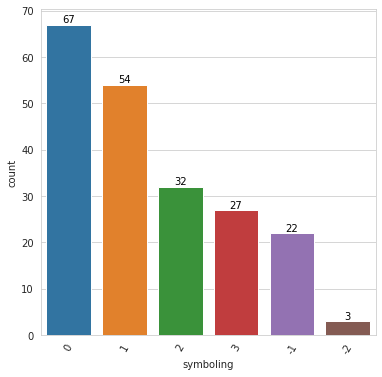

In [9]:
# lets first have a look at the unique values of this variable
make_countplot(data, 'symboling')

Due to the range of the variable (starting -ve and ending +ve), it will be difficult to interpret the result. To make it all +ve, we'll shift variable by 3, i.e. add 3.

In [10]:
data['symboling'] = data['symboling'] + 3
data['symboling'].unique()

array([6, 4, 5, 3, 2, 1])

By doing this we have made a constant change in the variable which doesnot effect the regression but imrpoves interpretability.

***Before proceeding lets make a function to create dummy variables, concatinating with main dataset, and dropping original variables***

In [11]:
# dummy variable with least count amongst all class will be dropped

def make_dummies(dataframe, variable):
    dummy_to_drop = data[variable].value_counts().index[-1]
    dummy_data = pd.get_dummies(dataframe[variable], prefix=variable)
    dataframe = pd.concat([data, dummy_data], axis = 1)
    dataframe = dataframe.drop([variable], axis = 1)
    dataframe = dataframe.drop([variable + '_' + dummy_to_drop], axis = 1)
    return dataframe

### 3. CarName

In [12]:
# lets first have a look at the values of this variable
data['CarName'].head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

The variable consists of 2 parts, car's company and car's model. We will consider only car's company for regression.

In [13]:
# lets create a new variable CarCompany in the dataset
data['CarCompany'] = data['CarName'].str.split(' ', n=1, expand=True)[0]
data['CarCompany'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarCompany, dtype: object

In [14]:
# lets have a look at the unique values of this variable
data['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

As we can notice, there are multiple errors in the name of car company.

In [15]:
# lets correct the names by replacing the errors with standard names
carcompany_correction_map = {'alfa-romero': 'alfa-romeo', 'maxda': 'mazda', 'Nissan': 'nissan',\
                             'porcshce': 'porsche','toyouta': 'toyota', 'vokswagen': 'volkswagen',\
                             'vw': 'volkswagen'}
data = data.replace({'CarCompany': carcompany_correction_map})

# lets have a look at the unique values of this variable
data['CarCompany'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

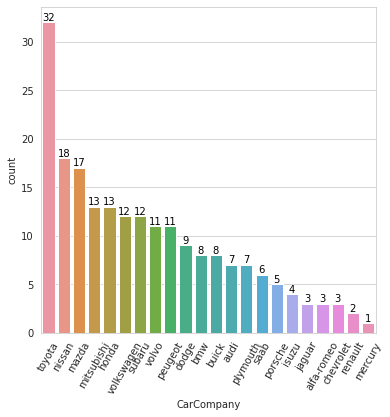

In [16]:
# lets have a look at the count of each company the data
carcompany_value_count = data['CarCompany'].value_counts()
make_countplot(data, 'CarCompany')

Even after correcting car company name, there are still 20+ companies. These if converted directly to dummy variables, will create large number of columns. Lets combine these companies based on the median car price that the company is offering.  

In [17]:
carCompany_price = data.groupby(by='CarCompany')['price'].median().sort_values(ascending=False)
carCompany_price

CarCompany
jaguar        35550.0
buick         32892.0
porsche       32528.0
bmw           22835.0
volvo         18420.0
audi          17710.0
peugeot       16630.0
mercury       16503.0
alfa-romeo    16500.0
saab          15275.0
mazda         10595.0
volkswagen     9737.5
renault        9595.0
toyota         9103.0
isuzu          8916.5
mitsubishi     8499.0
nissan         8124.0
subaru         7894.0
plymouth       7609.0
dodge          7609.0
honda          7295.0
chevrolet      6295.0
Name: price, dtype: float64

In [18]:
# dividing and creating intervals using pd.cut
cut = pd.cut(carCompany_price, 3)
cut

CarCompany
jaguar          (25798.333, 35550.0]
buick           (25798.333, 35550.0]
porsche         (25798.333, 35550.0]
bmw           (16046.667, 25798.333]
volvo         (16046.667, 25798.333]
audi          (16046.667, 25798.333]
peugeot       (16046.667, 25798.333]
mercury       (16046.667, 25798.333]
alfa-romeo    (16046.667, 25798.333]
saab           (6265.745, 16046.667]
mazda          (6265.745, 16046.667]
volkswagen     (6265.745, 16046.667]
renault        (6265.745, 16046.667]
toyota         (6265.745, 16046.667]
isuzu          (6265.745, 16046.667]
mitsubishi     (6265.745, 16046.667]
nissan         (6265.745, 16046.667]
subaru         (6265.745, 16046.667]
plymouth       (6265.745, 16046.667]
dodge          (6265.745, 16046.667]
honda          (6265.745, 16046.667]
chevrolet      (6265.745, 16046.667]
Name: price, dtype: category
Categories (3, interval[float64]): [(6265.745, 16046.667] < (16046.667, 25798.333] < (25798.333, 35550.0]]

In [19]:
# getting the intervals
carCompany_price_bins = cut.dtypes.categories
carCompany_price_bins

IntervalIndex([(6265.745, 16046.667], (16046.667, 25798.333], (25798.333, 35550.0]],
              closed='right',
              dtype='interval[float64]')

Now, lets use the derived intervals and apply them to price column to create a new column called `CarClass` that will represent if the car is from a high range company(S), medium range company(A) or a low range company(B).

In [20]:
bins = [0, carCompany_price_bins[0].right, carCompany_price_bins[1].right, np.inf]
data['CarClass'] = pd.cut(data['price'], bins=bins, labels=['B','A','S'])

Lets create a countplot for our new CarClass column

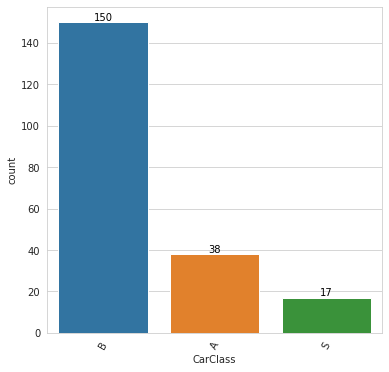

In [21]:
# lets have a look at the counts again
make_countplot(data, 'CarClass')

In [22]:
# drop CarName and CarCompany as now they are redundant variables
data = data.drop(['CarName','CarCompany'], axis=1)

# make dummy variables out of CarClass column
data = make_dummies(data, 'CarClass')

# lets have a look at the data again
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarClass_B,CarClass_A
0,6,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0
1,6,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1
2,4,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1
3,5,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0
4,5,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1


### 4. fueltype

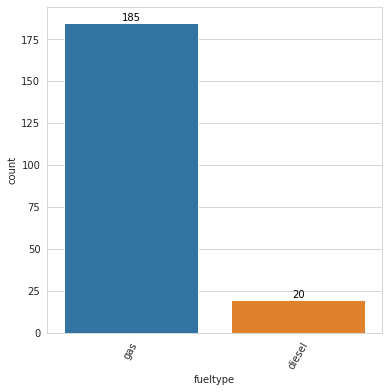

In [23]:
# lets have a look at the unique values of this variable
make_countplot(data, 'fueltype')

Replace this variable with its dummy values.

In [24]:
data = make_dummies(data, 'fueltype')

# lets have a look at the data again
data.head()

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarClass_B,CarClass_A,fueltype_gas
0,6,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495.0,1,0,1
1,6,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500.0,0,1,1
2,4,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,16500.0,0,1,1
3,5,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,13950.0,1,0,1
4,5,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,17450.0,0,1,1


### 5. aspiration

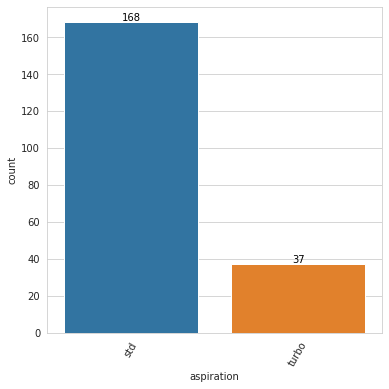

In [25]:
# lets have a look at the unique values of this variable
make_countplot(data, 'aspiration')

Replace this variable with its dummy values.

In [26]:
data = make_dummies(data, 'aspiration')

# lets have a look at the data again
data.head()

,symboling,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarClass_B,CarClass_A,fueltype_gas,aspiration_std
0,6,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,9.0,111,5000,21,27,13495.0,1,0,1,1
1,6,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,9.0,111,5000,21,27,16500.0,0,1,1,1
2,4,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,...,9.0,154,5000,19,26,16500.0,0,1,1,1
3,5,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,...,10.0,102,5500,24,30,13950.0,1,0,1,1
4,5,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,...,8.0,115,5500,18,22,17450.0,0,1,1,1


### 6. doornumber

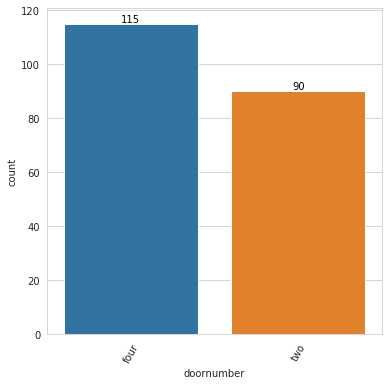

In [27]:
# lets have a look at the unique values of this variable
make_countplot(data, 'doornumber')

Replace this variable with its dummy values.

In [28]:
data = make_dummies(data, 'doornumber')

# lets have a look at the data again
data.head()

,symboling,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,horsepower,peakrpm,citympg,highwaympg,price,CarClass_B,CarClass_A,fueltype_gas,aspiration_std,doornumber_four
0,6,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,111,5000,21,27,13495.0,1,0,1,1,0
1,6,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,...,111,5000,21,27,16500.0,0,1,1,1,0
2,4,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,...,154,5000,19,26,16500.0,0,1,1,1,0
3,5,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,...,102,5500,24,30,13950.0,1,0,1,1,1
4,5,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,...,115,5500,18,22,17450.0,0,1,1,1,1


### 7. carbody

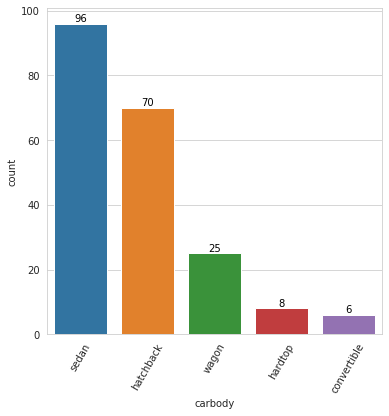

In [29]:
# lets have a look at the count of each company the data
carbody_value_count = data['carbody'].value_counts()
make_countplot(data, 'carbody')

Considering a category significant only if has atleast 5% count in the dataset. `5% of 205 = 10`

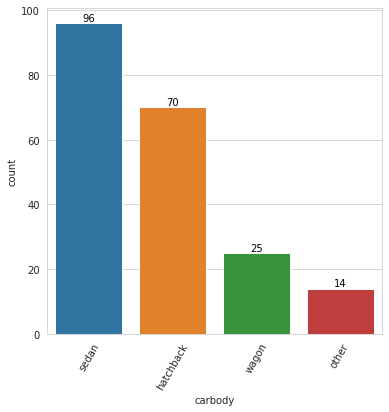

In [30]:
# combining categories with less than threshold value
data['carbody'] = pd.Series(np.where(data['carbody'].isin(carbody_value_count.index[carbody_value_count <= 10]),\
                                        'other', data['carbody']))

# lets have a look at the counts again
make_countplot(data, 'carbody')

Replace this variable with its dummy values.

In [31]:
data = make_dummies(data, 'carbody')

# lets have a look at the data again
data.head()

,symboling,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,highwaympg,price,CarClass_B,CarClass_A,fueltype_gas,aspiration_std,doornumber_four,carbody_hatchback,carbody_sedan,carbody_wagon
0,6,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,...,27,13495.0,1,0,1,1,0,0,0,0
1,6,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,...,27,16500.0,0,1,1,1,0,0,0,0
2,4,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,...,26,16500.0,0,1,1,1,0,1,0,0
3,5,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,...,30,13950.0,1,0,1,1,1,0,1,0
4,5,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,...,22,17450.0,0,1,1,1,1,0,1,0


### 8. drivewheel

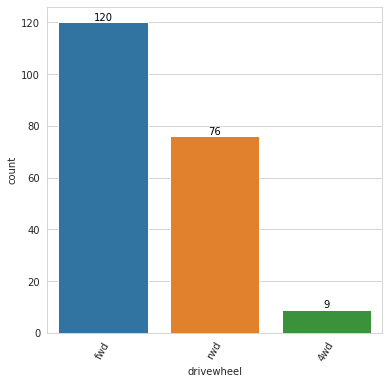

In [32]:
# lets have a look at the unique values of this variable
make_countplot(data, 'drivewheel')

Replace this variable with its dummy values.

In [33]:
data = make_dummies(data, 'drivewheel')

# lets have a look at the data again
data.head()

,symboling,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,...,CarClass_B,CarClass_A,fueltype_gas,aspiration_std,doornumber_four,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd
0,6,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,...,1,0,1,1,0,0,0,0,0,1
1,6,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,...,0,1,1,1,0,0,0,0,0,1
2,4,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,...,0,1,1,1,0,1,0,0,0,1
3,5,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,...,1,0,1,1,1,0,1,0,1,0
4,5,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,...,0,1,1,1,1,0,1,0,0,0


### 9. enginelocation

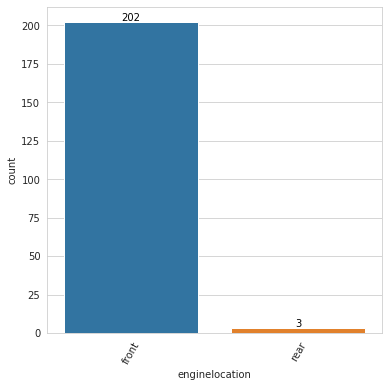

In [34]:
# lets have a look at the unique values of this variable
make_countplot(data, 'enginelocation')

Replace this variable with its dummy values.

In [35]:
data = make_dummies(data, 'enginelocation')

# lets have a look at the data again
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,...,CarClass_A,fueltype_gas,aspiration_std,doornumber_four,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_front
0,6,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,...,0,1,1,0,0,0,0,0,1,1
1,6,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,...,1,1,1,0,0,0,0,0,1,1
2,4,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,...,1,1,1,0,1,0,0,0,1,1
3,5,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,...,0,1,1,1,0,1,0,1,0,1
4,5,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,...,1,1,1,1,0,1,0,0,0,1


### 10. enginetype

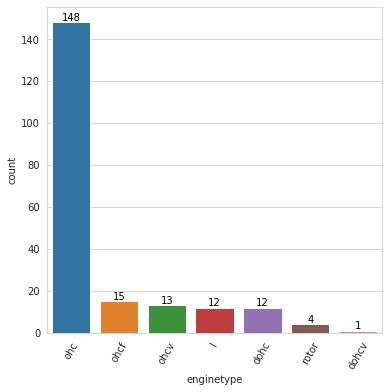

In [36]:
# lets have a look at the unique values of this variable
enginetype_value_count = data['enginetype'].value_counts()
make_countplot(data, 'enginetype')

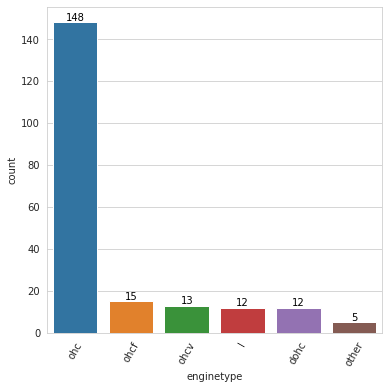

In [37]:
# combining categories with less than threshold value
data['enginetype'] = pd.Series(np.where(data['enginetype'].isin(enginetype_value_count.index[enginetype_value_count <= 10]),\
                                        'other', data['enginetype']))

# lets have a look at the counts again
make_countplot(data, 'enginetype')

Replace this variable with its dummy values.

In [38]:
data = make_dummies(data, 'enginetype')

# lets have a look at the data again
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,...,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv
0,6,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,...,0,0,0,1,1,1,0,0,0,0
1,6,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,...,0,0,0,1,1,1,0,0,0,0
2,4,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,...,0,0,0,1,1,0,0,0,0,1
3,5,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,...,1,0,1,0,1,0,0,1,0,0
4,5,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,...,1,0,0,0,1,0,0,1,0,0


### 11. cylindernumber

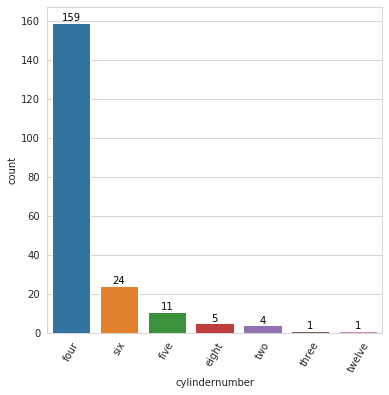

In [39]:
# lets have a look at the unique values of this variable
make_countplot(data, 'cylindernumber')

cylindernumber is an ordinal categorical variable and represent numbers hence can be converted to numerical values. But this operation should not change the nature and order in this variable.

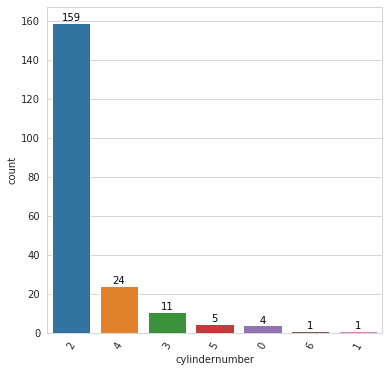

In [40]:
cylindernumber_map = {'two': 0, 'three': 1, 'four': 2, 'five': 3, 'six': 4, 'eight': 5, 'twelve': 6}
data = data.replace({'cylindernumber': cylindernumber_map})

# lets have a look at count plot again
make_countplot(data, 'cylindernumber')

In [41]:
data['cylindernumber'].describe()

count    205.000000
mean       2.336585
std        0.890515
min        0.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        6.000000
Name: cylindernumber, dtype: float64

### 12. fuelsystem

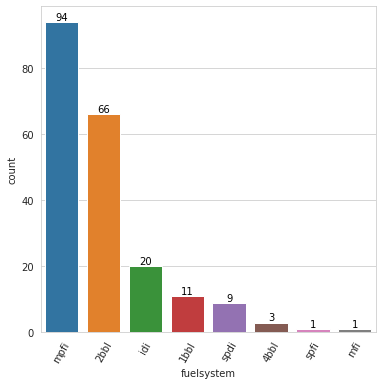

In [42]:
# lets have a look at the unique values of this variable
fuelsystem_value_count = data['fuelsystem'].value_counts()
make_countplot(data, 'fuelsystem')

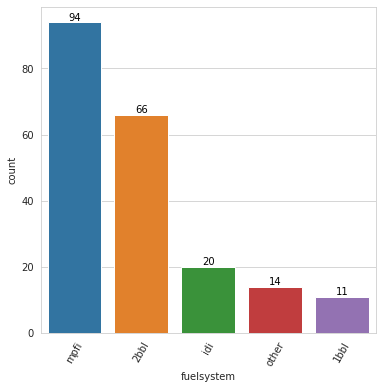

In [43]:
# combining categories with less than threshold value
data['fuelsystem'] = pd.Series(np.where(data['fuelsystem'].isin(fuelsystem_value_count.index[fuelsystem_value_count <= 10]),\
                                        'other', data['fuelsystem']))

# lets have a look at the counts again
make_countplot(data, 'fuelsystem')

Replace this variable with its dummy values.

In [44]:
data = make_dummies(data, 'fuelsystem')

# lets have a look at the data again
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_other
0,6,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,...,1,1,0,0,0,0,0,0,1,0
1,6,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,...,1,1,0,0,0,0,0,0,1,0
2,4,94.5,171.2,65.5,52.4,2823,4,152,2.68,3.47,...,1,0,0,0,0,1,0,0,1,0
3,5,99.8,176.6,66.2,54.3,2337,2,109,3.19,3.40,...,1,0,0,1,0,0,0,0,1,0
4,5,99.4,176.6,66.4,54.3,2824,3,136,3.19,3.40,...,1,0,0,1,0,0,0,0,1,0


Lets have a look at the data info after treating all the categorical variables

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
symboling               205 non-null int64
wheelbase               205 non-null float64
carlength               205 non-null float64
carwidth                205 non-null float64
carheight               205 non-null float64
curbweight              205 non-null int64
cylindernumber          205 non-null int64
enginesize              205 non-null int64
boreratio               205 non-null float64
stroke                  205 non-null float64
compressionratio        205 non-null float64
horsepower              205 non-null int64
peakrpm                 205 non-null int64
citympg                 205 non-null int64
highwaympg              205 non-null int64
price                   205 non-null float64
CarClass_B              205 non-null uint8
CarClass_A              205 non-null uint8
fueltype_gas            205 non-null uint8
aspiration_std          205 non-null uint8
doornumber_four    

Now lets have a look at numeric variables

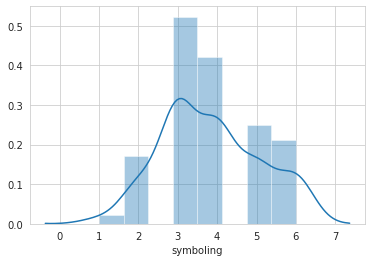

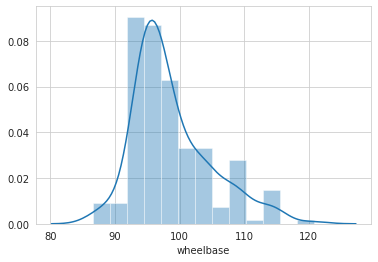

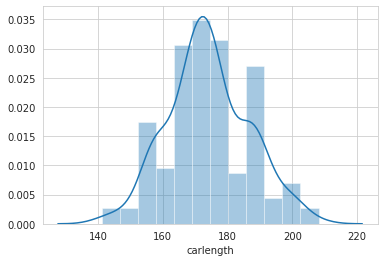

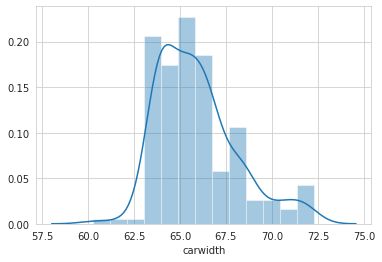

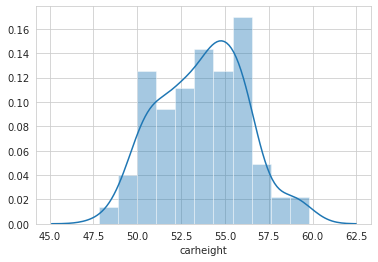

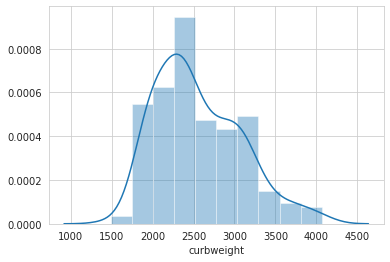

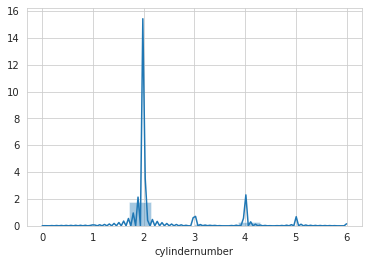

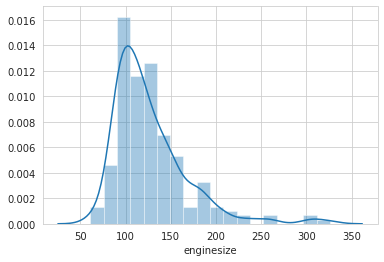

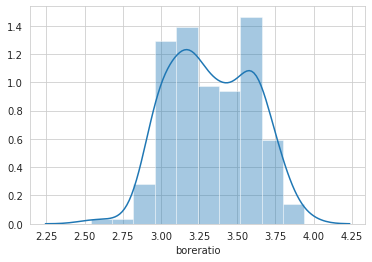

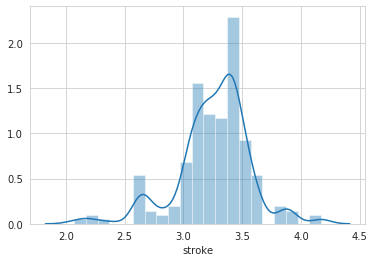

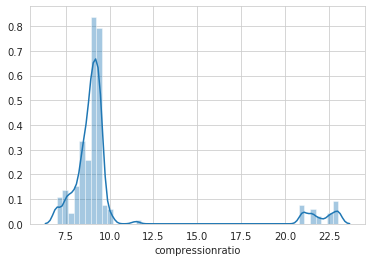

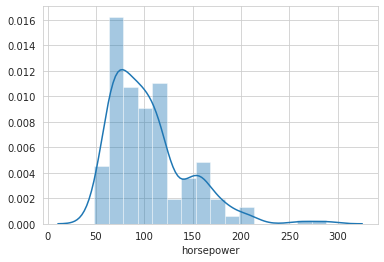

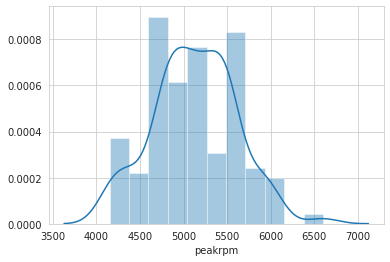

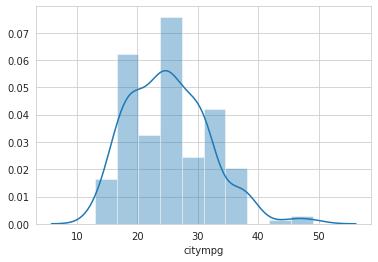

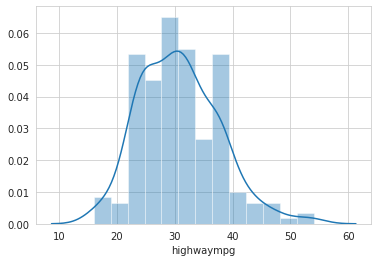

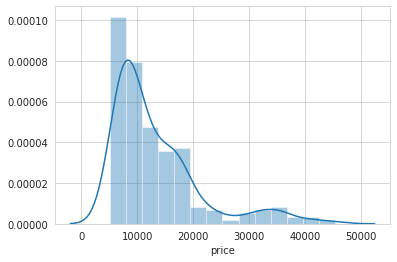

In [46]:
# ploting distribution plot for each variable

numerical_data = data.select_dtypes(include=['int64', 'float64'])
for col in numerical_data.columns:
    sns.distplot(numerical_data[col])
    plt.show()

All the numeric variables are almost normally distributed. Also none of them have outliers which needs to be treated.

### III. Spliting dataset and Scaling<a id='III'></a>

Spliting into training and testing

In [47]:
# import required libraries
from sklearn.model_selection import train_test_split

# spliting data into train and test set with train size as 75% of original data
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.75, random_state = 100)
print('Shape of training data: ' + str(data_train.shape))
print('Shape of testing data: ' + str(data_test.shape))

Shape of training data: (153, 36)
Shape of testing data: (52, 36)


Rescaling numeric features. We'll use MinMaxScaler.

In [48]:
# import required libraries and create a scaler object
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [49]:
# Apply scaler() to all the columns except the and 'dummy' variables
num_vars = data.select_dtypes(include=['int64', 'float64']).columns

data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

# lets have a look at the data
data_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_other
164,0.6,0.272414,0.448780,0.308333,0.400000,0.277735,0.333333,0.139623,0.404762,0.424242,...,1,0,0,1,0,0,1,0,0,0
188,0.8,0.368966,0.497561,0.433333,0.658333,0.314973,0.333333,0.181132,0.404762,0.611111,...,1,0,0,1,0,0,0,0,1,0
7,0.6,0.662069,0.839024,0.925000,0.658333,0.568658,0.500000,0.283019,0.404762,0.611111,...,1,0,0,1,0,0,0,0,1,0
158,0.4,0.313793,0.409756,0.341667,0.433333,0.305275,0.333333,0.184906,0.468254,0.585859,...,1,0,0,1,0,0,0,1,0,0
123,0.2,0.575862,0.544715,0.358333,1.000000,0.406129,0.333333,0.230189,0.531746,0.641414,...,1,0,0,1,0,0,1,0,0,0


In [50]:
# lets have a look at data description after scaling
data_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_other
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.562092,0.409759,0.525862,0.459150,0.486220,0.406996,0.392157,0.241460,0.497718,0.539942,...,0.986928,0.065359,0.058824,0.699346,0.084967,0.058824,0.346405,0.098039,0.431373,0.065359
std,0.242521,0.202947,0.200082,0.184837,0.208172,0.205790,0.154691,0.151958,0.204628,0.157197,...,0.113956,0.247971,0.236067,0.460048,0.279749,0.236067,0.477387,0.298344,0.496894,0.247971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.409756,0.308333,0.350000,0.248254,0.333333,0.135849,0.357143,0.464646,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.341379,0.502439,0.425000,0.491667,0.355702,0.333333,0.184906,0.468254,0.555556,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.503448,0.637398,0.525000,0.641667,0.552366,0.333333,0.301887,0.682540,0.616162,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IV. Model Building<a id='IV'></a>

To start with, lets have a look at correlation of price with other variables.

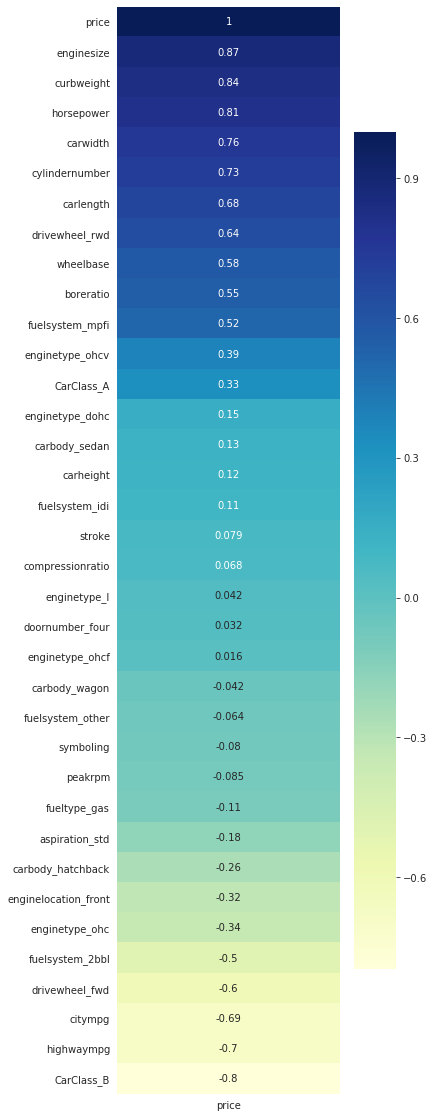

In [51]:
price_corr = pd.DataFrame(data.corr()['price'].sort_values(ascending=False))
plt.figure(figsize = (5, 20))
sns.heatmap(price_corr, cmap='YlGnBu', annot=True)
plt.show()

Many variables such as eniginesize, curbweight, horsepower, carwidth etc. are highly correlated with price. Lets have a look at the visual representation of the same.

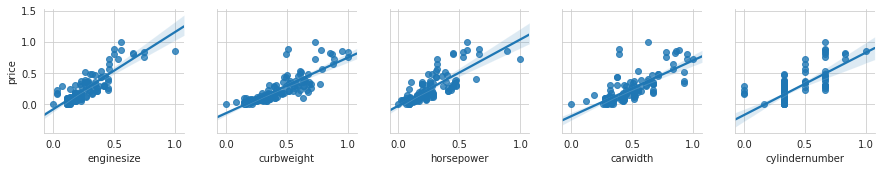

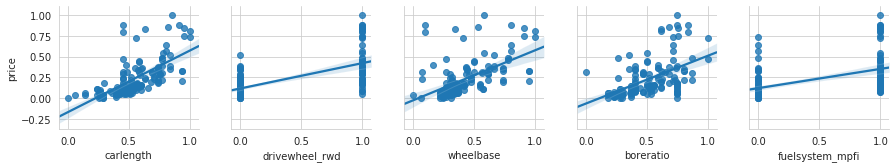

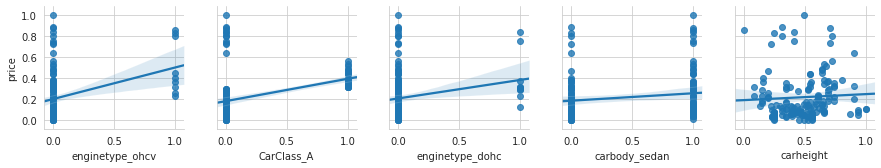

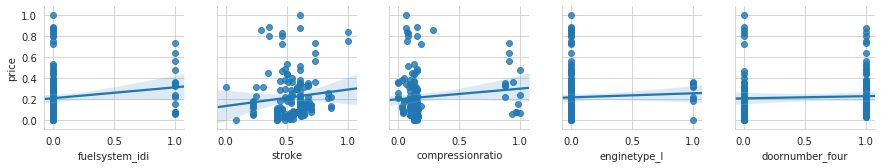

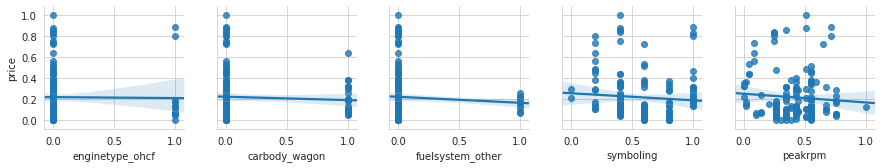

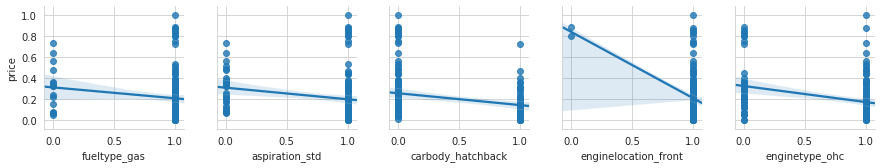

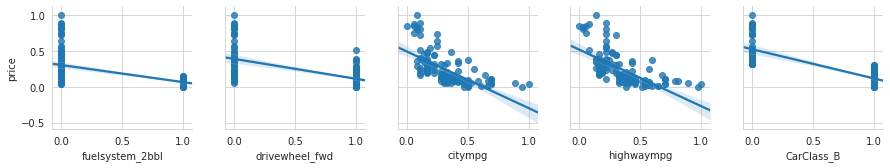

In [52]:
# take all independent variables in decreasing order of collinearity
independents = price_corr.index[price_corr.index != 'price']

# plot independent variables against target
for i in range(independents.size//5):
    sns.pairplot(data_train, y_vars='price', x_vars=independents[i*5:i*5+5], kind='reg')
    plt.show()

Again it is evident from these graphs that there is a clear linear relationship between price and atleast the top 10 independent variables.

Lets also explore the correlation between each variable and check if the there are any clusters present based on that correlation.

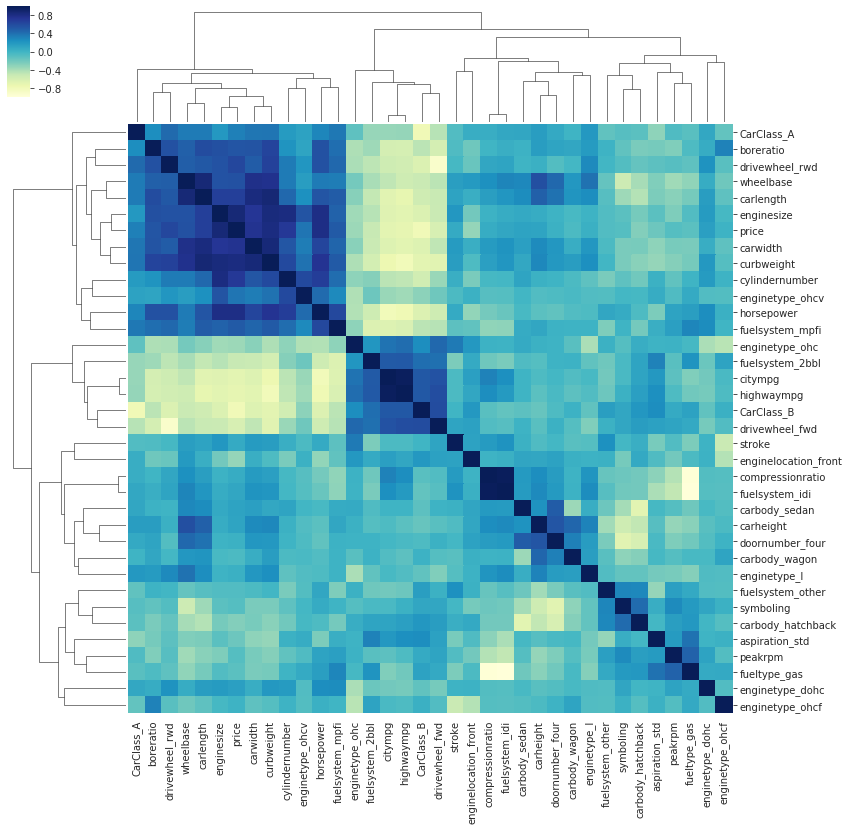

In [53]:
sns.clustermap(data.corr(), cmap='YlGnBu', figsize=(13, 13))

There are clearly multiple clusters present in the correaltion matrix. Major ones are as follows - 
1. Cluster 1
    - CarClass_A
    - boreratio
    - drivewheel_rwd
    - wheelbase
    - carlength
    - enginesize
    - price
    - carwidth
    - curbweight
    - cylindernumber
    - horsepower
2. Cluster 2
    - enginetype_ohc
    - fuelsystem_2bbl
    - citympg
    - highwaympg
    - CarClass_B
    - drivewheel_fwd

Both clusters have high positive intra-correlation and high negative inter-correlation. It can be understood from price perspective. Cluster 1 has positive correlation with price and Cluster 2 has negative.

Also few variables have high correlation such as compressionratio and fuelsystem_idi, citympg and highwaympg, etc.
These correlation are expected as per the domain knowledge.

***Recurrsive Feature Elimination (RFE)***

We require RFE in this case because number of features is high and RFE provides an automatic removal of features based on significance and Variance Inflation Factor (VIF). We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn).

In [54]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [55]:
# seperating independent variaboles(X) and target variable(y) 
y_train = data_train.pop('price')
X_train = data_train

In [56]:
# Running RFE with the output number of the variable equal to 20
lmRFE = LinearRegression()
lmRFE.fit(X_train, y_train) 

# running RFE
rfe = RFE(lmRFE, 20)             
rfe = rfe.fit(X_train, y_train)

In [57]:
rfe_support = pd.DataFrame({'Variable': X_train.columns,'RFE_Support': rfe.support_,'RFE_ranking': rfe.ranking_})
rfe_support = rfe_support.sort_values('RFE_ranking').reset_index(drop=True)
rfe_support

,Variable,RFE_Support,RFE_ranking
0,fuelsystem_other,True,1
1,carbody_wagon,True,1
2,enginetype_l,True,1
3,enginetype_ohc,True,1
4,enginetype_ohcf,True,1
5,fuelsystem_mpfi,True,1
6,CarClass_A,True,1
7,CarClass_B,True,1
8,highwaympg,True,1
9,enginelocation_front,True,1


Lets have a look at the variables that were eliminated by RFE.

In [58]:
# variables that are not supported by RFE
print('Non supported variables: ' + str(list(X_train.columns[~rfe.support_])))

Non supported variables: ['symboling', 'carwidth', 'carheight', 'cylindernumber', 'boreratio', 'horsepower', 'fueltype_gas', 'aspiration_std', 'doornumber_four', 'carbody_hatchback', 'carbody_sedan', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_idi']


RFE eliminated variables that were not significant for our regression model. Some such as symbolying, fueltype_gas, carheight etc. are not significantly correlated with price(as evident from the graph earlier), others such as horespower, fuelsystem_idi etc. are just redundant due to multicolinearity.

Now we have the top 20 variables supported by RFE. Lets do manual feature elimination based on significance and VIF. 

In [59]:
col = X_train.columns[rfe.support_]

### Building model using statsmodel, for the detailed statistics

***Model 1***

In [60]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     162.6
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           8.98e-83
Time:                        20:16:03   Log-Likelihood:                 265.23
No. Observations:                 153   AIC:                            -488.5
Df Residuals:                     132   BIC:                            -424.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6137 

`R-squared` of first model came out to be `0.961`. But many of the variables are not significant also there may be multicollinearity amongst variables. We'll eliminate variables untill we get a stable model. Initially we'll consider p-value for feature elimination and later we'll consider VIF too.

Variable with highest p-value is `wheelbase`. As we can notice fro the pairplot made earlier, wheelbase doesnot have a strong linear relation with price, it is rather random. Lets remove that variable and run the model again.

***Model 2***

In [61]:
# Drop the variable with highest p-value
X_train_rfe = X_train_rfe.drop('wheelbase', axis=1)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     171.8
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           8.63e-84
Time:                        20:16:03   Log-Likelihood:                 264.95
No. Observations:                 153   AIC:                            -489.9
Df Residuals:                     133   BIC:                            -429.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6228 

R-squared didn't change after dropping wheelbase. Also significance of other variables have also increased. Next variables with highest p-values are `compressionratio` and like wheelbase, its relation with price is weak. Lets drop it and observe the difference. 

***Model 3***

In [62]:
# Drop the variable with highest p-value
X_train_rfe = X_train_rfe.drop(['compressionratio'], axis=1)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     180.5
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           1.38e-84
Time:                        20:16:03   Log-Likelihood:                 264.05
No. Observations:                 153   AIC:                            -490.1
Df Residuals:                     134   BIC:                            -432.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6201 

R-squared didn't change after dropping compressionratio. Next variables with highest p-values are `peakrpm` and like compressionratio, its relation with price is weak. Lets drop it and observe the difference. 

***Model 4***

In [63]:
# Drop the variable with highest p-value
X_train_rfe = X_train_rfe.drop(['peakrpm'], axis=1)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     190.1
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           2.27e-85
Time:                        20:16:03   Log-Likelihood:                 263.09
No. Observations:                 153   AIC:                            -490.2
Df Residuals:                     135   BIC:                            -435.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6780 

Next variable with highest p-value is `fuelsystem_other`. Lets drop it and observe the difference.

***Model 5***

In [64]:
# Drop the variable with highest p-value
X_train_rfe = X_train_rfe.drop(['fuelsystem_other'], axis=1)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     200.1
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           4.63e-86
Time:                        20:16:04   Log-Likelihood:                 261.86
No. Observations:                 153   AIC:                            -489.7
Df Residuals:                     136   BIC:                            -438.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6969 

After this step, before moving forward, lets also check the VIF for each variable.

In [65]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)[1:]
vif

,Features,VIF
1,citympg,26.12
2,highwaympg,25.59
3,curbweight,18.22
4,enginesize,11.71
5,enginetype_ohc,11.11
6,CarClass_B,10.94
7,CarClass_A,6.59
8,enginetype_ohcf,6.11
9,carlength,5.66
10,enginetype_ohcv,5.33


Again the R-squared value of the model is not affected much. Also, citympg and highwaympg are insignificant because high performance costly cars have low milage and price decreases with increase in milage till certain point but then it levels off and costly family cars are also designed to have high milage. citympg and highwaympg may have higher order relationship. Also, it is evident from their VIF that they are causing multicolinearity. Lets drop them and re run the model.

***Model 6***

In [66]:
# Drop the variable with highest p-value
X_train_rfe = X_train_rfe.drop(['citympg','highwaympg'], axis=1)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     226.9
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           8.66e-88
Time:                        20:16:04   Log-Likelihood:                 260.22
No. Observations:                 153   AIC:                            -490.4
Df Residuals:                     138   BIC:                            -445.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6590 

In [67]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()

# leaving const out of this calculation
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)[1:]
vif

,Features,VIF
1,curbweight,15.19
2,enginesize,11.32
3,CarClass_B,10.45
4,enginetype_ohc,9.00
5,CarClass_A,6.24
6,carlength,5.62
7,enginetype_ohcf,5.11
8,enginetype_ohcv,4.65
9,enginetype_dohc,3.83
10,enginetype_l,3.18


`carlegth` has both high p-value and VIF. Lets drop it and run the model again.

***Model 7***

In [68]:
# Drop the variable with highest p-value
X_train_rfe = X_train_rfe.drop(['carlength'], axis=1)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     242.2
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           1.58e-88
Time:                        20:16:04   Log-Likelihood:                 259.04
No. Observations:                 153   AIC:                            -490.1
Df Residuals:                     139   BIC:                            -447.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6521 

In [69]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()

# leaving const out of this calculation
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)[1:]
vif

,Features,VIF
1,enginesize,11.29
2,CarClass_B,10.14
3,enginetype_ohc,8.72
4,curbweight,8.43
5,CarClass_A,6.13
6,enginetype_ohcf,5.07
7,enginetype_ohcv,4.64
8,enginetype_dohc,3.81
9,enginetype_l,3.14
10,stroke,2.25


`stroke` is at the border as far as the p-value is concerned and its VIF is also in acceptable range but as per the pairplot made earlier, the relation between price and stroke is not significant. Lets drop it and re run the model.

***Model 7***

In [70]:
# Drop the variable with highest p-value
X_train_rfe = X_train_rfe.drop(['stroke'], axis=1)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           6.06e-89
Time:                        20:16:04   Log-Likelihood:                 257.01
No. Observations:                 153   AIC:                            -488.0
Df Residuals:                     140   BIC:                            -448.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6266 

In [71]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)[1:]
vif

,Features,VIF
1,enginesize,10.64
2,CarClass_B,9.38
3,enginetype_ohc,8.71
4,curbweight,8.24
5,CarClass_A,5.98
6,enginetype_ohcv,4.42
7,enginetype_ohcf,4.26
8,enginetype_dohc,3.79
9,enginetype_l,3.11
10,fuelsystem_mpfi,1.61


Now as we can notice, both p-values and VIF of independent variables are in acceptable ranges. Also, statistics such as R-squared, Adjusted R-squared, F-statistic, AIC and BIC are in acceptable ranges. Lets move on to residual analysis to understand our model better.

### V. Residual Analysis<a id='V'></a>

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [72]:
# predicting target variable based on our latest model(lm) and our latest independent variables(X_train_rfe)
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Error')

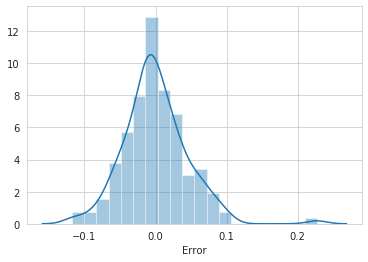

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
res = (y_train - y_train_pred)
sns.distplot(res, bins = 20)                  # Plot heading 
plt.xlabel('Error')                         # X-label

We can observe that the error terms are ***normally distributed*** with a slight outlier near the right tail. It is also ***centered around zero***. This means that we can safely derive interpretations from our model.

Lets also plot the relation between the predicted variable and residuals.

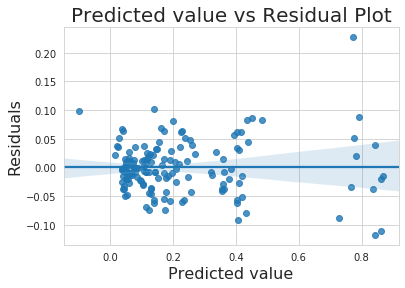

In [74]:
plt.figure()
sns.regplot(x=y_train_pred,y=res)
plt.xlabel('Predicted value', fontsize=16)
plt.ylabel('Residuals', fontsize=16)
plt.title('Predicted value vs Residual Plot', fontsize=20)
plt.show()

We can observe the following from the above plot - 
1. Mean of Residuals is zero
2. Scatter of residuals is completely random and also Regression line coincides with y = 0 and hence there is no relation/pattern in the residuals i.e. most of it is explained by our model. ***Error terms are independent of each other.***
3. Spread of residuals is mostly contained between 0.10 and -0.10 with a couple of exceptions. This suggests that the ***variance of error terms is constant i.e. homoscedastic***

### VI. Making Predictions and Model Evaluation<a id='VI'></a>

Scale the test data using the scaler fitted on train data

In [75]:
# applying only transform on test dataset
data_test[num_vars] = scaler.transform(data_test[num_vars])

Dividing test data into X_test and y_test

In [76]:
y_test = data_test.pop('price')
X_test = data_test

Add constants and keep only those variables in test data that were chosen during the model building step

In [77]:
# add constant
X_test = sm.add_constant(X_test)

# filtering columns
X_test = X_test[X_train_rfe.columns]

Make prediction using the above built X_test

In [78]:
y_test_pred = lm.predict(X_test)

Lets evaluate the model's accuracy by ploting the actual y_test and the predicted y_test_pred

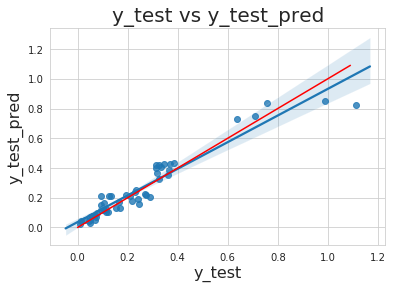

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
ax = sns.regplot(y_test,y_test_pred)

# baseline of x = y
x = np.arange(0,1.1,0.01)
y = x
plt.plot(x,y,'r-')

plt.title('y_test vs y_test_pred', fontsize=20)         # Plot heading 
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                     # Y-label
plt.show()

As we can observe, the regression line for y_test_pred vs y_test is very close to our base line of x = y. Also, all the data points are very much close to the baseline and hence the difference between y_test_pred and y_test is very small.

### Model metrics on test data

In [80]:
# import required libraries
from sklearn.metrics import r2_score, explained_variance_score, max_error, mean_absolute_error, \
                            mean_squared_error, mean_squared_log_error, median_absolute_error

metrics = [explained_variance_score(y_test, y_test_pred), max_error(y_test, y_test_pred), \
           mean_absolute_error(y_test, y_test_pred), mean_squared_error(y_test, y_test_pred), \
           mean_squared_log_error(y_test, y_test_pred), median_absolute_error(y_test, y_test_pred), \
           r2_score(y_test, y_test_pred)]

index = ['Explained Variance Score', 'Max Error', 'Mean Absolute Error', 'Mean Squared Error', \
         'Mean Squared Log Error', 'Median Absolute Error', 'r2 Score']

metricsdf = pd.DataFrame({'Metrics': metrics}, index=index)
metricsdf

,Metrics
Explained Variance Score,0.916736
Max Error,0.290547
Mean Absolute Error,0.046738
Mean Squared Error,0.004523
Mean Squared Log Error,0.002050
Median Absolute Error,0.028656
r2 Score,0.914362


### VII. Interpretation<a id='VII'></a>

With r2 score of 0.95 on train data and 0.91 on test data, our model is:

<hr>
$ price = 0.6266 + 0.3583  \times  curbweight + 0.1631  \times  enginesize - 0.4078 \times CarClass\_B - 0.2483 \times CarClass\_A - 0.0356 \times carbody\_wagon - 0.1767 \times enginelocation\_front - 0.1144 \times enginetype\_dohc - 0.1404 \times enginetype\_l - 0.0764 \times enginetype\_ohc - 0.0931 \times enginetype\_ohcf 
- 0.1322 \times enginetype\_ohcv + 0.0455 \times fuelsystem\_mpfi $
<hr>

After creating dummy variables, coefficients of variables derived from the same column can be interpreted relative to each other and considering the eliminated dummy variable as the base.

Following is the interpretation of model:
1. `curbweight` has a positive coefficient and with increase in curbweight, price increases. curbweight is defined as the weight of a car without occupants or baggage. curbweight can also indirectly be influenced by:
    - wheelbase(distance between the centers of the front and rear wheels) which has high correlation with curbweight.
    - carlength which has high correlation with curbweight.
    - carwidth which has high correlation with curbweight.
    - carbody
<hr>
2. `enginesize` has a positive coefficient and with increase in enginesize, price increases. enginesize can also indirectly be influenced by:
    - boreratio(the ratio between cylinder bore diameter and piston stroke) which has high correlation with enginesize.
    - stroke(the length that piston travels when moving from bottom position to the top position).
    - compressionratio(the ratio of the maximum to minimum volume in the cylinder).
    - horsepower which has high correlation with enginesize.
    - cylindernumber which has high positive correlation with enginesize.
<hr>
3. `CarClass_B` has a negative coefficient. It means that it attracts lower price as compared to cars of class S which was dropped. This inference is aligned with the fact that cars of class S are from companies like Jaguar, Buick and Porche which produces costly cars where as cars of class B are from companies like Honda, Nissan and Toyota which produces daily use family cars.
<hr>
4. `CarClass_A` has a negative coefficient but its absolute value is lower than that of CarClass_B. It means cars of class A(BMW, Audi, Peugeot) are costlier than cars of class B but still attracts lower price than cars of class S.
<hr>
5. `carbody_wagon` has a negative coefficient. It means that it attracts lower price as compared to cars with carbody type as hardtop and convertible. This is aligned with the fact that high end sports/luxery cars are hardtop or convertible. Also, carbody_wagon is a significant indicator that is it not prefered in the market. Whereas carbody types such as sedan and hatchback doesnot influence price.
<hr>
6. `enginelocation_front` has a negative coefficient. It means that it attracts lower price as compared to cars with enginelocation rear. Although number of cars with engine location rear are very less in the dataset, it plays a huge role and is aligned with the fact that high perfomace cars have their engine at the rear end to provide higher stability. These cars are also costlier than usual.
<hr>
7. `enginetype` influence the price in the following order
    - (rotor, dohcv) > l > ohcv > dohc > ohcf > ohc
<hr>
8. `fuelsystem_mpfi` has a positive coefficient and with presence of fuelsystem_mpfi, price increases. It is aligned with the fact that it is the latest and most sofisticated fuelsystem and designed for most appropriate amount of fuel injection. 

***Other important characteristics observed while creating the model***

1. **Manufacturer** of the car i.e. company plays an important role in determining the price of the car as it represents the complete build style starting from engine, carbody, fuelsystem, horsepower etc.
2. **cylindernumber and horsepower** also have high positive correlation with price and its aligned with the fact that these variable directly affects the performance and as the performance increases, price increases. These parameters however were encapsulated in enginesize.
3. **citympg and highwaympg** have a strong relation with price but is not linear as is evident from their scatterplot and also price increases with milage till a certain point then family cars with high milage gets cheaper. A higher degree polynomial can fit their relation better.